Input audio shape: (229317,), duration: 5.20 seconds
Detected silent gap from sample 71117 to 79937.
Processed audio shape: (229317,), duration: 5.20 seconds


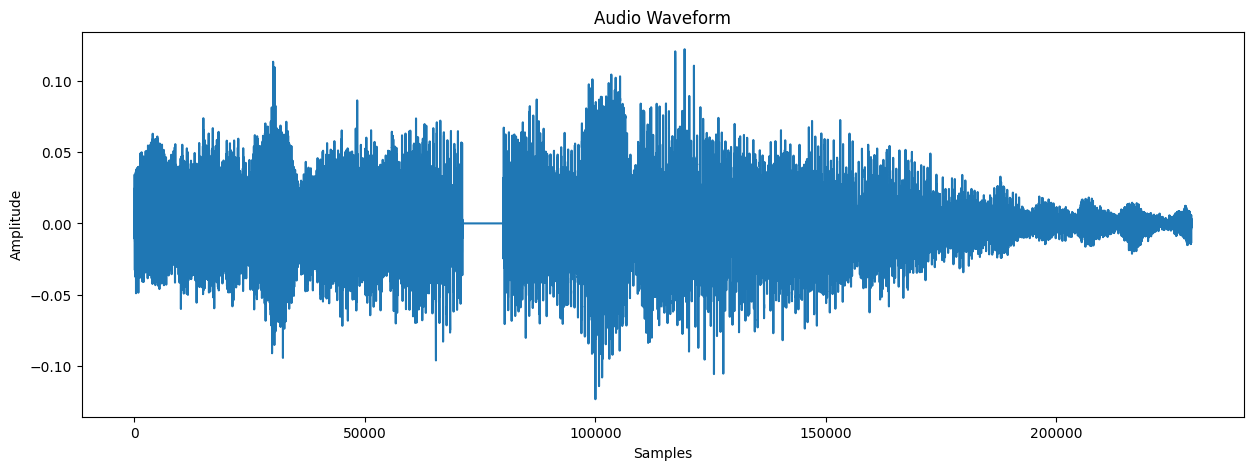

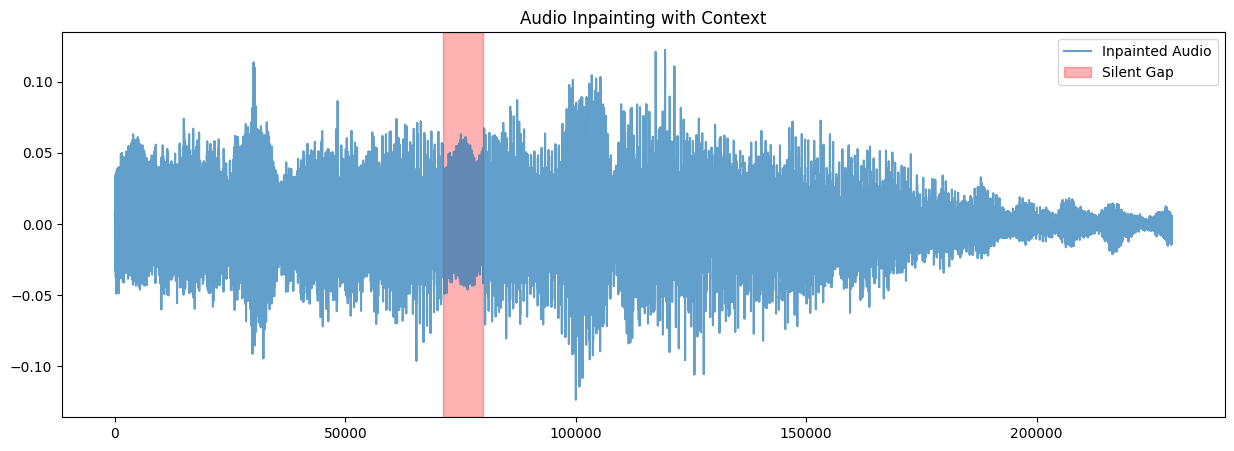

Original audio duration: 5.20 seconds
Inpainted audio duration: 5.20 seconds
Inpainted Audio:


In [63]:
import os
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.display import Audio, display

def detect_silent_gap(audio, sr, silence_duration_ms=200, threshold=0.001):
    silence_samples = int((silence_duration_ms / 1000) * sr)
    abs_audio = np.abs(audio)

    for i in range(len(audio) - silence_samples):
        window = abs_audio[i : i + silence_samples]
        if np.mean(window) < threshold:
            gap_start = i
            gap_end = i + silence_samples
            return gap_start, gap_end

    print("No sufficiently long silent gap found.")
    return None

def inpaint_audio_with_external(audio, gap_start, gap_end, context_audio):

    gap_length = gap_end - gap_start
    if len(context_audio) > gap_length:
        context_audio = context_audio[:gap_length]
    elif len(context_audio) < gap_length:
        context_audio = np.tile(context_audio, int(np.ceil(gap_length / len(context_audio))))[:gap_length]

    audio[gap_start:gap_end] = context_audio[:gap_length]
    return audio

def process_audio_file_with_context(file_path, context_file_path, sr, silence_duration_ms=200, threshold=1e-4):

    audio, _ = torchaudio.load(file_path)
    audio = audio.squeeze().numpy()
    context_audio, _ = torchaudio.load(context_file_path)
    context_audio = context_audio.squeeze().numpy()

    print(f"Input audio shape: {audio.shape}, duration: {len(audio) / sr:.2f} seconds")

    gap = detect_silent_gap(audio, sr, silence_duration_ms, threshold)
    if gap is None:
        return audio, audio, None, None

    gap_start, gap_end = gap
    print(f"Detected silent gap from sample {gap_start} to {gap_end}.")
    inpainted_audio = inpaint_audio_with_external(audio, gap_start, gap_end, context_audio)

    print(f"Processed audio shape: {inpainted_audio.shape}, duration: {len(inpainted_audio) / sr:.2f} seconds")
    return audio, inpainted_audio, gap_start, gap_end

def visualize_and_play(original, inpainted, gap_start, gap_end, sr):
    plt.figure(figsize=(15, 5))
    plt.plot(inpainted, label="Inpainted Audio", alpha=0.7)
    if gap_start is not None and gap_end is not None:
        plt.axvspan(gap_start, gap_end, color='red', alpha=0.3, label="Silent Gap")
    plt.legend()
    plt.title("Audio Inpainting with Context")
    plt.show()

    print(f"Original audio duration: {len(original) / sr:.2f} seconds")
    print(f"Inpainted audio duration: {len(inpainted) / sr:.2f} seconds")

    print("Inpainted Audio:")
    display(Audio(inpainted, rate=sr))

if __name__ == "__main__":
    file_path = '/Users/johannasmriti/Downloads/musicnet/data_with_gaps/1727_part10.wav'  
    context_file_path = file_path
    sr = 44100  
    silence_duration_ms = 200  

    original_audio, inpainted_audio, gap_start, gap_end = process_audio_file_with_context(
        file_path, context_file_path, sr, silence_duration_ms=silence_duration_ms
    )

    def plot_audio(audio, sr):
        plt.figure(figsize=(15, 5))
        plt.plot(audio)
        plt.title("Audio Waveform")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()

    audio, _ = torchaudio.load(file_path)
    plot_audio(audio.squeeze().numpy(), sr)
    display(Audio(audio, rate=sr))

    visualize_and_play(original_audio, inpainted_audio, gap_start, gap_end, sr)


Input audio shape: (87892,), duration: 5.49 seconds
No sufficiently long silent gap found.


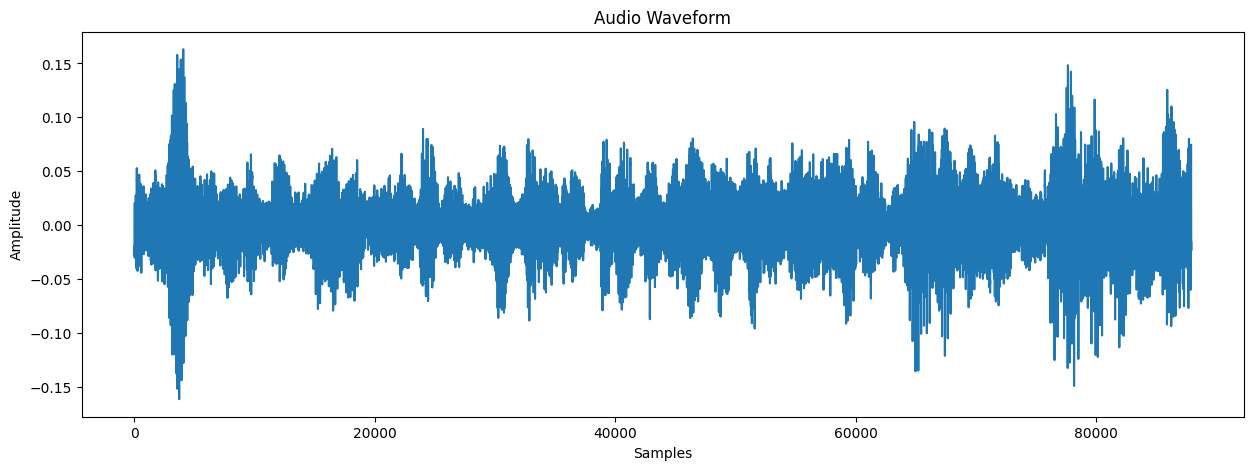

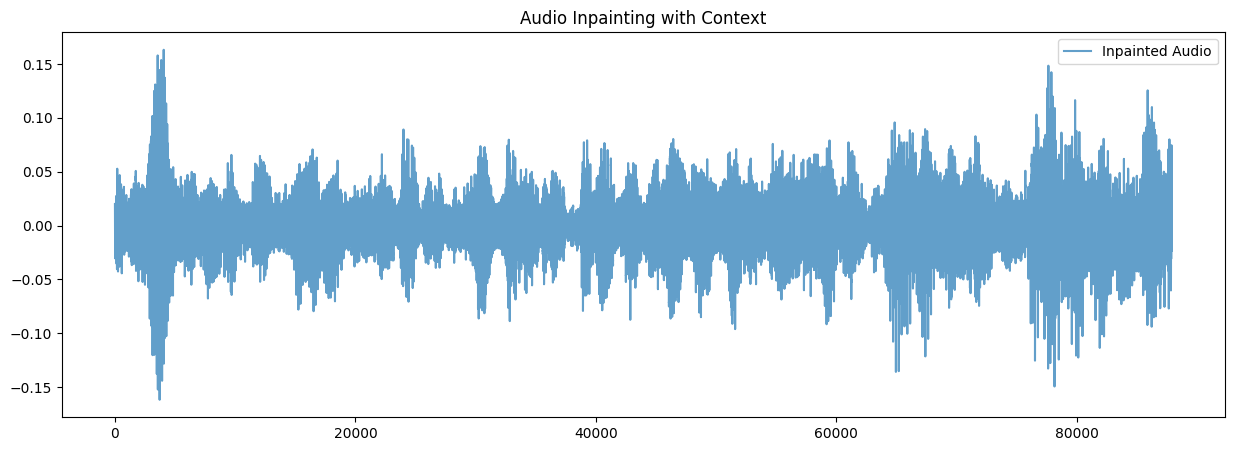

Original audio duration: 5.49 seconds
Inpainted audio duration: 5.49 seconds
Inpainted Audio:


In [ ]:
import os
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.display import Audio, display

def detect_silent_gap(audio, sr, silence_duration_ms=200, threshold=0.001):
    silence_samples = int((silence_duration_ms / 1000) * sr)
    abs_audio = np.abs(audio)

    for i in range(len(audio) - silence_samples):
        window = abs_audio[i : i + silence_samples]
        if np.mean(window) < threshold:
            gap_start = i
            gap_end = i + silence_samples
            return gap_start, gap_end

    print("No sufficiently long silent gap found.")
    return None

def inpaint_audio_with_external(audio, gap_start, gap_end, context_audio):
    gap_length = gap_end - gap_start
    if len(context_audio) > gap_length:
        context_audio = context_audio[:gap_length]
    elif len(context_audio) < gap_length:
        context_audio = np.tile(context_audio, int(np.ceil(gap_length / len(context_audio))))[:gap_length]

    audio[gap_start:gap_end] = context_audio[:gap_length]
    return audio

def process_audio_file_with_context(file_path, context_file_path, sr, silence_duration_ms=200, threshold=1e-4):

    audio, _ = torchaudio.load(file_path)
    audio = audio.squeeze().numpy()

    context_audio, _ = torchaudio.load(context_file_path)
    context_audio = context_audio.squeeze().numpy()

    print(f"Input audio shape: {audio.shape}, duration: {len(audio) / sr:.2f} seconds")

    gap = detect_silent_gap(audio, sr, silence_duration_ms, threshold)
    if gap is None:
        return audio, audio, None, None

    gap_start, gap_end = gap
    print(f"Detected silent gap from sample {gap_start} to {gap_end}.")
    inpainted_audio = inpaint_audio_with_external(audio, gap_start, gap_end, context_audio)

    print(f"Processed audio shape: {inpainted_audio.shape}, duration: {len(inpainted_audio) / sr:.2f} seconds")
    return audio, inpainted_audio, gap_start, gap_end

def visualize_and_play(original, inpainted, gap_start, gap_end, sr):
    
    plt.figure(figsize=(15, 5))
    plt.plot(inpainted, label="Inpainted Audio", alpha=0.7)
    if gap_start is not None and gap_end is not None:
        plt.axvspan(gap_start, gap_end, color='red', alpha=0.3, label="Silent Gap")
    plt.legend()
    plt.title("Audio Inpainting with Context")
    plt.show()

    print(f"Original audio duration: {len(original) / sr:.2f} seconds")
    print(f"Inpainted audio duration: {len(inpainted) / sr:.2f} seconds")


    print("Inpainted Audio:")
    display(Audio(inpainted, rate=sr))

if __name__ == "__main__":
    file_path = '/Users/johannasmriti/Downloads/cleaned_audio.wav'  
    context_file_path = file_path
    sr = 16000  
    silence_duration_ms = 200  

    original_audio, inpainted_audio, gap_start, gap_end = process_audio_file_with_context(
        file_path, context_file_path, sr, silence_duration_ms=silence_duration_ms
    )

    def plot_audio(audio, sr):
        plt.figure(figsize=(15, 5))
        plt.plot(audio)
        plt.title("Audio Waveform")
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()

    audio, _ = torchaudio.load(file_path)
    plot_audio(audio.squeeze().numpy(), sr)
    display(Audio(audio, rate=sr))

    visualize_and_play(original_audio, inpainted_audio, gap_start, gap_end, sr)
